In [1]:
import sys
sys.path.append('../')
from src.utils import *
from src.first_and_last_touch_model import *

In [3]:
df = load_data()
# df = remove_direct_entries(df)
# df = remove_outliers_z_score(df, 3.5)
# df = transform_utm_columns_into_list_of_strings(df)

In [2]:
df = load_data()
df = create_touch_columns(df)

In [6]:
impact_dict = predict_channel_impact(df, 'first_touch_utm_source', True)

In [7]:
impact_dict

{'synerise': 0.2,
 'facebook.com': 0.1,
 'facebook': 0.14,
 'google': 0.36,
 'google.com': 0.09,
 'bing.com': 0.11}

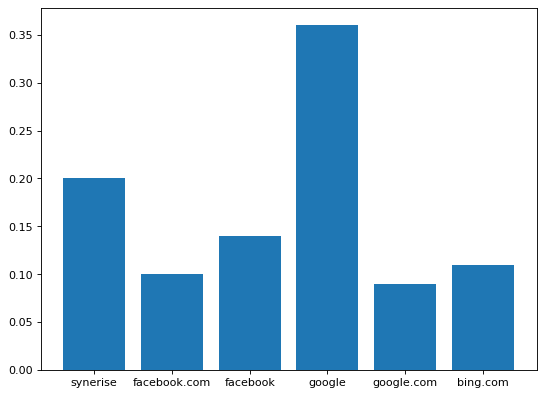

In [11]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
D = impact_dict
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

In [4]:
print(predict_channel_impact(df, 'first_touch_utm_source', True))

{'synerise': 0.2, 'facebook.com': 0.1, 'facebook': 0.14, 'google': 0.36, 'google.com': 0.09, 'bing.com': 0.11}


In [5]:
len(df)

459917

In [5]:
df.head()

,client_uuid,revenue,utm_source,utm_medium,event_dates,event_timestamps,days_till_conversions,conversion_date,conversion_timestamp,first_touch_utm_source,last_touch_utm_source,first_touch_utm_medium,last_touch_utm_medium
0,46843260447612932,1597.00,[(direct)],[(none)],['2019-08-02'],['2019-08-02 01:36:17'],[0],2019-08-02,2019-08-02 01:36:17,None,(direct),None,(none)
1,73937596961622962,34.99,[(direct)],[(none)],['2019-07-19'],['2019-07-19 15:27:24'],[14],2019-08-02,2019-08-02 21:08:16,None,(direct),None,(none)
2,94396730975196822,35.99,[(direct)],[(none)],['2019-08-02'],['2019-08-02 09:38:21'],[0],2019-08-02,2019-08-02 09:38:21,None,(direct),None,(none)
3,125013537097955872,34.99,[(direct)],[(none)],['2019-08-02'],['2019-08-02 15:15:40'],[0],2019-08-02,2019-08-02 15:15:40,None,(direct),None,(none)
4,162607037084320552,249.99,"[synerise, facebook, (direct), (direct), syner...","[organic, cpc, (none), sms_text, organic]","['2019-07-17','2019-07-27','2019-07-27','2019-...","['2019-07-17 08:08:00','2019-07-27 08:32:10','...","[16,6,6,6,6]",2019-08-02,2019-08-02 07:38:58,synerise,synerise,organic,organic


In [10]:
df[df['first_touch_utm_medium'].notna()]

,client_uuid,revenue,utm_source,utm_medium,event_dates,event_timestamps,days_till_conversions,conversion_date,conversion_timestamp,first_touch_utm_source,last_touch_utm_source,first_touch_utm_medium,last_touch_utm_medium
4,162607037084320552,249.99,"[synerise, facebook, (direct), (direct), syner...","[organic, cpc, (none), sms_text, organic]","['2019-07-17','2019-07-27','2019-07-27','2019-...","['2019-07-17 08:08:00','2019-07-27 08:32:10','...","[16,6,6,6,6]",2019-08-02,2019-08-02 07:38:58,synerise,synerise,organic,organic
6,245479691431714732,173.94,"[(direct), google.com, (direct), (direct)]","[(none), referral, sms_text, (none)]","['2019-07-22','2019-07-22','2019-07-22','2019-...","['2019-07-22 07:54:41','2019-07-22 07:57:21','...","[11,11,11,11]",2019-08-02,2019-08-02 17:45:23,google.com,(direct),referral,(none)
12,423257530869390002,274.94,"[(direct), facebook, google]","[sms_text, cpc, cpc]","['2019-05-31','2019-06-22','2019-06-22']","['2019-05-31 05:38:48','2019-06-22 05:22:16','...","[63,41,41]",2019-08-02,2019-08-02 07:41:15,facebook,google,sms_text,cpc
17,618125321206055252,269.99,"[synerise, google, synerise, google, facebook]","[organic, web_push, organic, cpc, cpc]","['2019-07-17','2019-07-17','2019-07-19','2019-...","['2019-07-17 03:56:43','2019-07-17 03:57:26','...","[16,16,14,14,14]",2019-08-02,2019-08-02 12:44:58,synerise,facebook,organic,cpc
21,853710216256722922,169.80,[synerise],[organic],['2019-07-23'],['2019-07-23 09:09:49'],[10],2019-08-02,2019-08-02 17:44:39,synerise,synerise,organic,organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459911,9387008742826233182,345.00,"[(direct), (direct), (direct), google.com, goo...","[(none), (none), (none), referral, web_push, s...","['2018-11-18','2018-12-20','2018-12-27','2018-...","['2018-11-18 01:57:22','2018-12-20 17:12:57','...","[41,9,2,2,2,2,2,2,2,2,2,2,2,2,0]",2018-12-29,2018-12-29 02:48:13,google.com,(direct),referral,(none)
459913,11645035604004122502,107.89,"[google, synerise, google, (direct)]","[web_push, organic, cpc, sms_text]","['2018-12-03','2018-12-29','2018-12-29','2018-...","['2018-12-03 14:58:36','2018-12-29 00:26:18','...","[26,0,0,0]",2018-12-29,2018-12-29 00:57:40,google,(direct),web_push,sms_text
459914,11951134685027657952,338.00,[google],[cpc],['2018-12-29'],['2018-12-29 00:14:38'],[0],2018-12-29,2018-12-29 00:19:01,google,google,cpc,cpc
459915,17520529140506420512,102.99,"[(direct), (direct), (direct), (direct), (dire...","[(none), (none), (none), (none), (none), (none...","['2018-12-23','2018-12-23','2018-12-23','2018-...","['2018-12-23 02:15:19','2018-12-23 18:45:08','...","[6,6,6,6,5,4,3,1,1,1,0]",2018-12-29,2018-12-29 00:12:38,google,(direct),cpc,(none)


In [3]:
len(df)

459917

In [4]:
len(df.dropna())

244608

In [2]:
df = load_data()
df = create_touch_columns(df)
print(predict_channel_impact(df, 'last_touch_utm_medium', True))

ValueError: too many values to unpack (expected 2)

In [4]:
df.head()

,client_uuid,revenue,utm_source,utm_medium,event_dates,event_timestamps,days_till_conversions,conversion_date,conversion_timestamp
0,46843260447612932,1597.00,['(direct)'],['(none)'],['2019-08-02'],['2019-08-02 01:36:17'],[0],2019-08-02,2019-08-02 01:36:17
1,73937596961622962,34.99,['(direct)'],['(none)'],['2019-07-19'],['2019-07-19 15:27:24'],[14],2019-08-02,2019-08-02 21:08:16
2,94396730975196822,35.99,['(direct)'],['(none)'],['2019-08-02'],['2019-08-02 09:38:21'],[0],2019-08-02,2019-08-02 09:38:21
3,125013537097955872,34.99,['(direct)'],['(none)'],['2019-08-02'],['2019-08-02 15:15:40'],[0],2019-08-02,2019-08-02 15:15:40
4,162607037084320552,249.99,"['synerise','facebook','(direct)','(direct)','...","['organic','cpc','(none)','sms_text','organic']","['2019-07-17','2019-07-27','2019-07-27','2019-...","['2019-07-17 08:08:00','2019-07-27 08:32:10','...","[16,6,6,6,6]",2019-08-02,2019-08-02 07:38:58


In [3]:
ble = predict_channel_impact(df, 'first_touch', 'utm_medium')

In [4]:
ble

{'e-mail': 11035968.462971,
 'organic': 10953544.822811,
 'cpc': 25556145.6250745,
 'sms_text': 17319211.3334375,
 'web_push': 10873711.062796,
 'referral': 1757157.3113819999,
 '(none)': 91028191.6823903}

In [3]:
predicted = predict_touch_model(df, 'first_touch', 'utm_medium')
rmse = measure_results(df.revenue, predicted)
print(f'Naive solution first_touch, utm_medium, RMSE = {rmse}')

predicted = predict_touch_model(df, 'last_touch', 'utm_medium')
rmse = measure_results(df.revenue, predicted)
print(f'Naive solution last_touch, utm_medium, RMSE = {rmse}')

Naive solution first_touch, utm_medium, RMSE = 844.6079042563491
Naive solution last_touch, utm_medium, RMSE = 843.3653430415172


In [4]:
predicted = predict_touch_model(df, 'first_touch', 'utm_source')
rmse = measure_results(df.revenue, predicted)
print(f'Naive solution first_touch, utm_source, RMSE = {rmse}')

predicted = predict_touch_model(df, 'last_touch', 'utm_source')
rmse = measure_results(df.revenue, predicted)
print(f'Naive solution last_touch, utm_source, RMSE = {rmse}')

Naive solution first_touch, utm_source, RMSE = 846.0006726714169
Naive solution last_touch, utm_source, RMSE = 845.19959539964


In [5]:
def measure_channel_impact(df, first_or_last, utm):
    df['touch'] = create_first_or_last_touch_column(df, first_or_last, utm)
    return df
    
ble = measure_channel_impact(df, 'first_touch', 'utm_medium')

In [6]:
ble.head()

,client_uuid,revenue,utm_source,utm_medium,event_dates,event_timestamps,days_till_conversions,conversion_date,conversion_timestamp,touch
4,162607037084320552,249.99,"[synerise, facebook, (direct), (direct), syner...","[organic, cpc, (none), sms_text, organic]","['2019-07-17','2019-07-27','2019-07-27','2019-...","['2019-07-17 08:08:00','2019-07-27 08:32:10','...","[16,6,6,6,6]",2019-08-02,2019-08-02 07:38:58,organic
6,245479691431714732,173.94,"[(direct), google.com, (direct), (direct)]","[(none), referral, sms_text, (none)]","['2019-07-22','2019-07-22','2019-07-22','2019-...","['2019-07-22 07:54:41','2019-07-22 07:57:21','...","[11,11,11,11]",2019-08-02,2019-08-02 17:45:23,(none)
12,423257530869390002,274.94,"[(direct), facebook, google]","[sms_text, cpc, cpc]","['2019-05-31','2019-06-22','2019-06-22']","['2019-05-31 05:38:48','2019-06-22 05:22:16','...","[63,41,41]",2019-08-02,2019-08-02 07:41:15,sms_text
17,618125321206055252,269.99,"[synerise, google, synerise, google, facebook]","[organic, web_push, organic, cpc, cpc]","['2019-07-17','2019-07-17','2019-07-19','2019-...","['2019-07-17 03:56:43','2019-07-17 03:57:26','...","[16,16,14,14,14]",2019-08-02,2019-08-02 12:44:58,organic
21,853710216256722922,169.80,[synerise],[organic],['2019-07-23'],['2019-07-23 09:09:49'],[10],2019-08-02,2019-08-02 17:44:39,organic


In [7]:
ble.revenue.sum()

168523930.30086228

In [9]:
organic = ble[ble.touch=='organic']

In [10]:
organic.revenue.sum()

10953544.822811

In [17]:
def remove_nones(df):
    return df[df.touch!='(none)']

In [18]:
ble = remove_nones(ble)

mediums = ble.touch.unique()
revenue_all = ble.revenue.sum()
impact = {}
for medium in mediums:
    revenue_specific = ble[ble.touch==medium].revenue.sum()
    impact[medium] = revenue_specific/revenue_all
    

In [19]:
impact

{'organic': 0.14134383410083526,
 'sms_text': 0.2234859831287454,
 'web_push': 0.1403136644239187,
 'cpc': 0.3297748506004031,
 'e-mail': 0.1424074234236726,
 'referral': 0.02267424432242473}

In [21]:
ble.touch.value_counts()

cpc         49219
sms_text    32219
e-mail      21352
web_push    21090
organic     21075
referral     2337
Name: touch, dtype: int64

In [23]:
{k: v for k, v in sorted(impact.items(), key=lambda item: item[1], reverse=True)}

{'cpc': 0.3297748506004031,
 'sms_text': 0.2234859831287454,
 'e-mail': 0.1424074234236726,
 'organic': 0.14134383410083526,
 'web_push': 0.1403136644239187,
 'referral': 0.02267424432242473}

In [29]:
rev = ble.touch.value_counts().to_dict()
rev

{'cpc': 49219,
 'sms_text': 32219,
 'e-mail': 21352,
 'web_push': 21090,
 'organic': 21075,
 'referral': 2337}

In [ ]:
{k: v for k, v in }